# Data Preprocessing

### Load Library

In [1]:
import os
import re
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_dir = '/data/ephemeral/home/data/'

### 1. json에서 csv 파일 변환

In [3]:
def json_to_csv(json_filepath, csv_filepath):
    """
    JSON 파일을 CSV 파일로 변환하는 함수.
    
    :param json_filepath: 변환할 JSON 파일 경로
    :param csv_filepath: 저장할 CSV 파일 경로
    """
    # 1. JSON 파일을 읽어들임
    with open(json_filepath, 'r') as json_file:
        json_data = json.load(json_file)

    # 2. CSV 파일로 저장
    with open(csv_filepath, 'w', newline='', encoding='utf-8') as csv_file:
        # 첫 번째 항목의 value 안의 key들을 CSV의 열 제목으로 사용
        first_key = next(iter(json_data))
        fieldnames = ['id'] + list(json_data[first_key].keys())  # id + 나머지 key들
        
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()  # 헤더 작성

        # 각 첫 번째 key (0, 1, 2, ...)를 id로 사용하고, 그 value를 나머지 컬럼에 넣음
        for key, value in json_data.items():
            row = {'id': key}  # 첫 번째 key를 id로 저장
            row.update(value)  # value 딕셔너리 안의 값을 row에 추가
            writer.writerow(row)

In [10]:
wiki_json = os.path.join(base_dir, 'wikipedia_documents.json')
wiki_csv = os.path.join(base_dir, 'wikipedia_documents.csv')
json_to_csv(wiki_json, wiki_csv)

In [13]:
df_wiki = pd.read_csv(wiki_csv)
df_wiki.head()

,id,text,corpus_source,url,domain,title,author,html,document_id
0,0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,NaN,나라 목록,NaN,NaN,0
1,1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,NaN,나라 목록,NaN,NaN,1
2,2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,NaN,백남준,NaN,NaN,2
3,3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,NaN,아오조라 문고,NaN,NaN,3
4,4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,NaN,아오조라 문고,NaN,NaN,4


### 2. 특수문자 제거

In [14]:
def clean_text(df):
    """
    DataFrame에서 'text' 열의 개행문자 및 특수문자를 제거하는 함수.
    
    :param df: DataFrame (전처리할 데이터)
    :return: 'text' 열의 특수문자를 제거한 DataFrame
    """
    text = df['text']
    cleaned_text = text.str.replace('\n', ' ', regex=False)  # 개행문자 제거
    cleaned_text = cleaned_text.str.replace('\"', '', regex=False)  # 큰따옴표 제거
    cleaned_text = cleaned_text.str.replace('\'', '', regex=False)  # 작은따옴표 제거
    
    return df

In [15]:
clean_text(df_wiki)

,id,text,corpus_source,url,domain,title,author,html,document_id
0,0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,NaN,나라 목록,NaN,NaN,0
1,1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,NaN,나라 목록,NaN,NaN,1
2,2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,NaN,백남준,NaN,NaN,2
3,3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,NaN,아오조라 문고,NaN,NaN,3
4,4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,NaN,아오조라 문고,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...
60608,60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,NaN,NaN,오키나와 현립 박물관·미술관,NaN,NaN,60608
60609,60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,NaN,NaN,오키나와 현립 박물관·미술관,NaN,NaN,60609
60610,60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,NaN,NaN,오키나와 현립 박물관·미술관,NaN,NaN,60610
60611,60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,NaN,NaN,단결권 및 단체교섭권 협약,NaN,NaN,60611


### 3. 한국어 비율별 데이터 분할

In [16]:
def calculate_korean_ratio(df):
    """
    주어진 DataFrame에서 'text' 열의 한국어 비율을 계산하여 'ratio' 열에 추가하는 함수.
    
    :param df: 입력 DataFrame
    :return: 한국어 비율이 추가된 DataFrame
    """
    def ratio(text):
        korean_count = len(re.findall(r'[가-힣]', text))  # 한국어 문자 개수 세기
        total_count = len(text)  # 전체 문자 개수
        if total_count == 0:  # 전체 문자가 0이면 비율을 0으로 반환
            return 0
        return korean_count / total_count * 100  # 한국어 비율을 백분율로 계산

    # 'text' 열에 대해 한국어 비율 계산하여 'ratio' 열 추가
    df['ratio'] = df['text'].apply(ratio)
    return df

In [18]:
calculate_korean_ratio(df_wiki)

,id,text,corpus_source,url,domain,title,author,html,document_id,ratio
0,0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,NaN,나라 목록,NaN,NaN,0,67.400881
1,1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,NaN,나라 목록,NaN,NaN,1,68.101933
2,2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,NaN,백남준,NaN,NaN,2,67.936069
3,3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,NaN,아오조라 문고,NaN,NaN,3,66.389351
4,4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,NaN,아오조라 문고,NaN,NaN,4,70.752688
...,...,...,...,...,...,...,...,...,...,...
60608,60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,NaN,NaN,오키나와 현립 박물관·미술관,NaN,NaN,60608,63.235294
60609,60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,NaN,NaN,오키나와 현립 박물관·미술관,NaN,NaN,60609,58.879619
60610,60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,NaN,NaN,오키나와 현립 박물관·미술관,NaN,NaN,60610,64.820847
60611,60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,NaN,NaN,단결권 및 단체교섭권 협약,NaN,NaN,60611,48.675497


In [21]:
def plot_ratio_distribution(df):
    """DataFrame의 'ratio' 값의 분포를 히스토그램과 KDE로 시각화하는 함수."""
    max_ratio = df['ratio'].max()
    min_ratio = df['ratio'].min()

    plt.figure(figsize=(10, 6))
    
    # 히스토그램 그리기
    sns.histplot(df['ratio'], bins=30, kde=True, color='purple')
    
    plt.title('Distribution of Korean Ratio', fontsize=15)
    plt.xlabel('Korean Ratio (%)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    print("Maximum Korean Ratio: {}".format(max_ratio))
    print("Minimum Korean Ratio: {}".format(min_ratio))

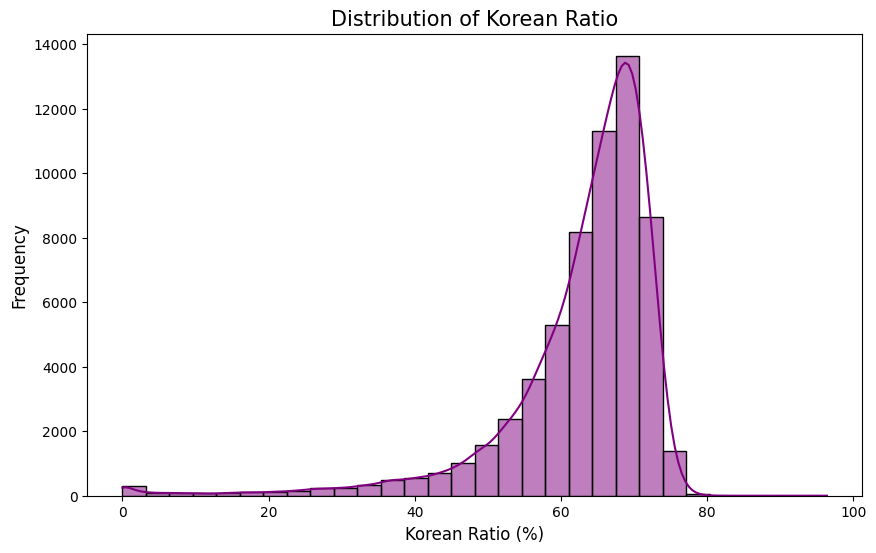

Maximum Korean Ratio: 96.3680179017127
Minimum Korean Ratio: 0.0


In [22]:
plot_ratio_distribution(df_wiki)

In [23]:
def split_dataframe_by_ratio(df):
    """'ratio' 값에 따라 DataFrame을 5개로 분할하여 반환하는 함수."""
    
    # 각 범위별 데이터프레임을 나눔
    df_1 = df[(df['ratio'] >= 0) & (df['ratio'] < 20)]
    df_2 = df[(df['ratio'] >= 20) & (df['ratio'] < 40)]
    df_3 = df[(df['ratio'] >= 40) & (df['ratio'] < 60)]
    df_4 = df[(df['ratio'] >= 60) & (df['ratio'] < 80)]
    df_5 = df[(df['ratio'] >= 80) & (df['ratio'] <= 100)]

    return df_1, df_2, df_3, df_4, df_5

In [24]:
wiki_1, wiki_2, wiki_3, wiki_4, wiki_5 = split_dataframe_by_ratio(df_wiki)

In [25]:
print("wiki_1 length: {}".format(len(wiki_1)))
print("wiki_2 length: {}".format(len(wiki_2)))
print("wiki_3 length: {}".format(len(wiki_3)))
print("wiki_4 length: {}".format(len(wiki_4)))
print("wiki_5 length: {}".format(len(wiki_5)))

wiki_1 length: 749
wiki_2 length: 1788
wiki_3 length: 12980
wiki_4 length: 45093
wiki_5 length: 3


### 4. Special Token 추가